# Multiple Linear Regression

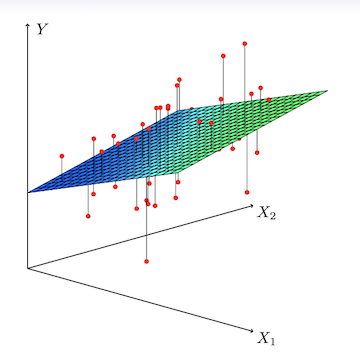

## Multiple Linear Regression
Multiple linear regression is simply a linear regression with more than one predictor, or independent variables. Let's recall the interpretation of $R^2$ in simple linear regression represents the proportion of variance explained by the model. What if we make the model more complex by including more predictors in it such that it account for even more variance in the outcome?

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + + \beta_3 X_3\cdots + \beta_k X_k + \epsilon$$

- We interpret $β_2$ as the average effect on Y of a one unit increase in $X_2$, holding all other predictors fixed.


- Likewise for the other predictors

### Graphical Representation
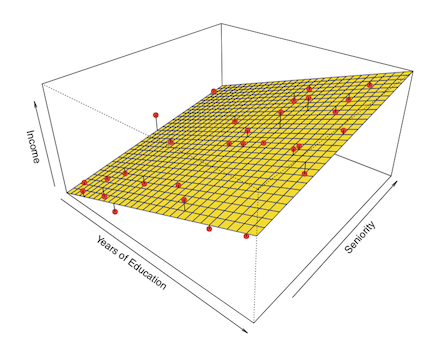

## Some Important Questions

When we perform multiple linear regression, we usually are interested in answering a few important questions.

1. At least one of the predictors $X_1$ , $X_2$ , . . . , $X_p$ useful in predicting the response?  



    - Hypothesis Testing
   
    - In the multiple regression setting with p predictors, we need to ask whether all of the regression coefficients are zero
    
    - Use F-statistic, if far away from 1 with corresponding low P-value reject null hypothesis. 
2. Do all the predictors help to explain Y, or is only a subset of the predictors useful?  



    - Can use Forward, Backward, or Mixed Selection


3. How well does the model fit the data?


    - Adjusted R-Squared: Increases or decreases if added features improve model.
    

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## Multi-collinearity
- is the case in which independent variables are correlated with each other creating unstable models by inflating the magnitude of coefficients/estimates.


- It also becomes difficult to determine which variable is contributing to predict the response variable. 


- VIF is calculated for each independent variable by calculating the R-squared value with respect to all the other independent variables and tries to eliminate which variable has the highest VIF value one by one:


$$ VIF = \frac{1}{1-R^2} $$


- How to diagnose: Look into scatter plots, run correlation coefficient on all the variables of data. Calculate the variance inflation factor (VIF). If VIF <= 4 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

In [90]:
wine_quality = pd.read_csv("winequality-red.csv",sep=';')
# Step for converting white space in columns to _ value for better handling
wine_quality.rename(columns=lambda x: x.replace(" ", "_"),
inplace=True)
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


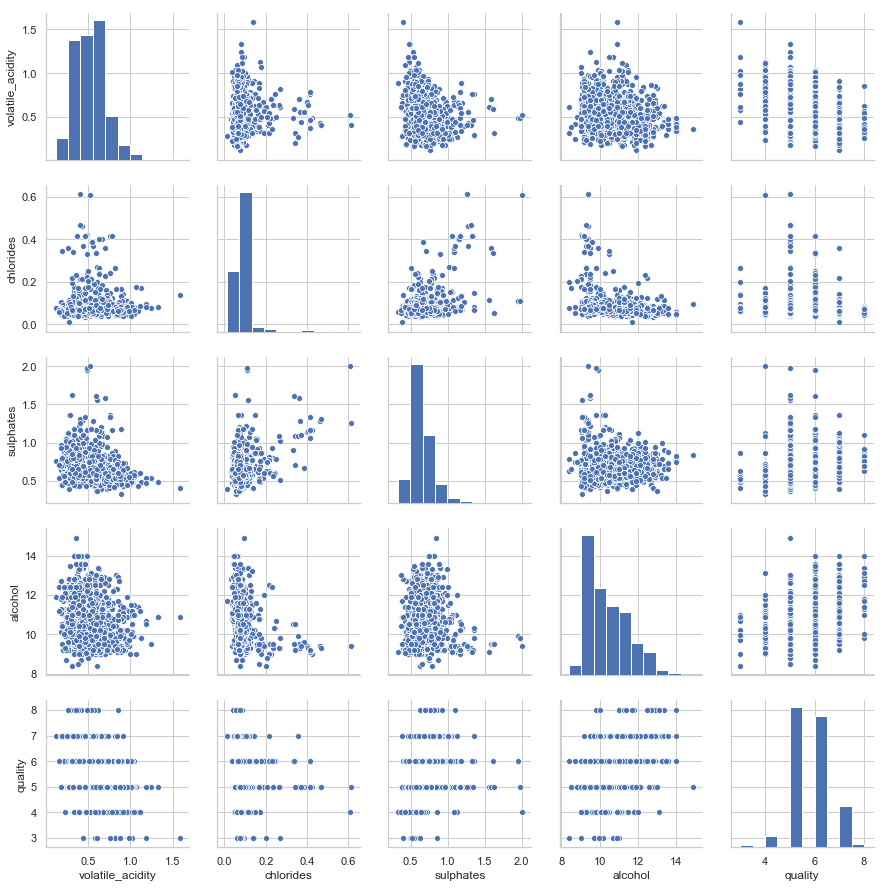

In [20]:
# Pair plots for sample five variables are shown as follows; you should try various 
# combinations to check various relationships visually between the various other variables
eda_colnms = [ 'volatile_acidity', 'chlorides', 'sulphates',
'alcohol','quality']
# Plots - pair plots
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(wine_quality[eda_colnms],height = 2.5,x_vars= eda_colnms,
y_vars= eda_colnms)
plt.show()

#### Correlation Plots

- In addition to visual plots, correlation coefficients are calculated to show the level of correlation in numeric terminology; these charts are used to drop variables in the initial stage, if there are many of them to start with:


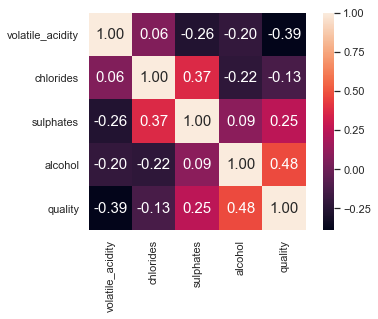

In [91]:
# Correlation coefficients
corr_mat = np.corrcoef(wine_quality[eda_colnms].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,fmt='.2f',annot_kws={'size': 15}, yticklabels=eda_colnms,xticklabels=eda_colnms)
plt.show()

### Backward and Forward Selection

- In the backward method, iterations start with considering all the variables and we will remove variables one by one until all the prescribed statistics are met.

- In the case of forward, we will start with no variables and keep on adding significant variables until the overall model's fit improves.

### Using Backward Selection

### Iteration 1

In [92]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

In [93]:
#Create the train and test data by randomly performing the data split. The random_state
#(random seed) is used for reproducible results:
x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

In [94]:
#In the following code, adding constant means creating an intercept variable. If we do not
#create an intercept, the coefficients will change accordingly:
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [95]:
#The following code creates a model summary including R-squared, adjusted R-squared, and
#the p-value of independent variables:
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          8.34e-100
Time:                        14:56:16   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9

In [96]:
#Calculate VIF for all individual variables. 
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
fixed_acidity 7.189
volatile_acidity 1.824
citric_acid 3.139
residual_sugar 1.742
chlorides 1.463
free_sulfur_dioxide 1.973
total_sulfur_dioxide 2.205
density 5.902
pH 3.224
sulphates 1.428
alcohol 2.93


### Key Metrics
- When training model focus on the model AIC, adjusted R-squared, an individual variable's P>|t|, and VIF values. 
- Any model would be considered as good to go having the following thumb rule criteria:
  - AIC: No absolute value is significant. It is a relative measure, the lower the better.
  - Adjusted R-squared: It is ≥ 0.7.
  - Individual variable's p-value (P>|t|): It is ≤ 0.05.
  - Individual variable's VIF: It is ≤ 5 

## Results 
- residual_sugar has highest the p-value of 0.668 
- fixed_acidity has the highest VIF value of 7.189.

### Iteration 2

In [97]:
# Let's rerun model with residual_sugar removed

colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
 'chlorides', 'free_sulfur_dioxide',
'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     62.62
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.12e-100
Time:                        15:00:33   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2229.
Df Residuals:                    1108   BIC:                             2284.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3

### Iteration 3

In [98]:
# Let's rerun model with density removed

colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
 'chlorides', 'free_sulfur_dioxide',
'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.40e-101
Time:                        15:03:14   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2227.
Df Residuals:                    1109   BIC:                             2277.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0

### Iteration 4

In [99]:
# Let's rerun model with fixed acidity removed

colnms = [ 'volatile_acidity', 'citric_acid',
 'chlorides', 'free_sulfur_dioxide',
'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     78.33
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          1.77e-102
Time:                        15:03:23   Log-Likelihood:                -1103.8
No. Observations:                1119   AIC:                             2226.
Df Residuals:                    1110   BIC:                             2271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2

### Iteration 5

In [100]:
# Let's rerun model with citric acid removed

colnms = [ 'volatile_acidity', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =0.7, random_state = 42)

x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

full_res = full_mod.fit()
print ("\n \n",full_res.summary())
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          4.31e-103
Time:                        15:03:25   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9

- **AIC:** Reduced from 2231 from iteration 1 to 2225 in iteration 5.


- **Adjusted R-squared:** Value changed to 0.356, which is a slight improvement but not worth enough!


- **Individual variable's p-value (P>|t|):** None of the variables are insignificant; all values are less than 0.05.


- **Individual variable's VIF:** All variables are less than five. Hence, we do not need to remove any further variable based on VIF value.

**no strong linear relationship between the dependent and independent variables exists.**

## Working With Categorical Variables

### Credit Example

In [89]:
credit = pd.read_csv("credit.csv")
credit=credit.loc[:, ~credit.columns.str.contains('^Unnamed')]
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Suppose that we wish to investigate differences in credit card balance between males and females, ignoring the other variables for the moment. 


- If a qualitative predictor (also known as a factor) only has two levels, or possible values, then incorporating it into a regression model is very simple. 


- We simply create an indicator or dummy variable that takes on two possible numerical values. For example, based on the gender variable, we can create a new variable that takes the form

$$
\begin{equation}
  x_{i} =
    \begin{cases}
      1 & \text{if $ith$ person is female}\\
      0 & \text{if $ith$ person is male}\\
    \end{cases}       
\end{equation}
$$
and use this variable as a predictor in the regression equation.

$$
\begin{equation}
  y_{i} =\beta_0+\beta_1*x_i+\epsilon_i=
    \begin{cases}
      \beta_0+\beta_1*x_i+\epsilon_i\,\ \text{if $ith$ person is female}\\
       \beta_0+\epsilon_i\,\ \text{if $ith$ person is male}\\
    \end{cases}       
\end{equation}
$$

- $β_0$ can be interpreted as the average credit card balance among males.


- $β_0$ + $β_1$ as the average credit card balance among females.


- $β_1$ as the average difference in credit card balance between females and males.

In [101]:
predict=credit[['Balance', 'Gender']]
response=credit['Balance']

In [102]:
#predict_dummy = pd.get_dummies(prac_data['Gender'],prefix = 'Gender',drop_first=True)
predict_dummy = pd.get_dummies(prac_data['Gender'],prefix = 'Gender')
predict_dummy.head()

,Gender_Female,Gender_Male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [103]:
predict_dummy=predict_dummy["Gender_Female"]
predict_dummy_new = sm.add_constant(predict_dummy)
full_mod = sm.OLS(response,predict_dummy_new)
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Wed, 07 Aug 2019   Prob (F-statistic):              0.669
Time:                        15:11:18   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           509.8031     33.128     15

### How to Interpret

The average credit card debt for males is estimated to be ${$509.80}$, whereas females are estimated to carry ${$19.73}$ in additional debt for a total of ${$509.80 + $19.73 = $ 529.53}$. 

However, we notice that the p-value for the dummy variable is very high. This indicates that there is no statistical evidence of a difference in average credit card balance between the genders.